In [1]:
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

from datetime import timedelta,datetime

import sys
from path import Path

In [2]:
class_path = Path("../../classes/pmmfs_ml")
sys.path.append(class_path)
from ml import ml

In [3]:
path_GR = "../Resources/raw/OxCGRT_latest(Aug31,2020).csv"   # Government Response
path_CD = "../Resources/raw/owid-covid-data(Aug31,2020).csv"   # COVID Data

In [4]:
data_GR = pd.read_csv(path_GR)    #Government Response
data_CD = pd.read_csv(path_CD)

/home/sami/anaconda3/envs/mlenv2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Drop rows from Government response for individual regions for CountryCodes USA and GBR

data_GR = data_GR[data_GR[["RegionName"]].isnull().values].copy()

In [6]:
df_GR = data_GR[['Date','CountryCode',]]
stringency_columns = [ x for x in data_GR if re.search("C\d|H1",x)]

for x in stringency_columns:
    df_GR[x] = data_GR[x]
    
df_GR

/home/sami/anaconda3/envs/mlenv2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,CountryCode,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag
0,20200101,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
1,20200102,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
2,20200103,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
3,20200104,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
4,20200105,ABW,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58799,20200827,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58800,20200828,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58801,20200829,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58802,20200830,ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_GR.isnull().sum()

Date                                        0
CountryCode                                 0
C1_School closing                        1166
C1_Flag                                 18029
C2_Workplace closing                     1268
C2_Flag                                 20349
C3_Cancel public events                  1204
C3_Flag                                 17224
C4_Restrictions on gatherings            1235
C4_Flag                                 19101
C5_Close public transport                1076
C5_Flag                                 28457
C6_Stay at home requirements             1237
C6_Flag                                 23086
C7_Restrictions on internal movement     1125
C7_Flag                                 23855
C8_International travel controls         1187
H1_Public information campaigns          1667
H1_Flag                                  9947
dtype: int64

In [8]:
for x in df_GR.columns:
    if re.search("C\d|H1",x):
        print(df_GR[x].value_counts())

3.0    20243
0.0    16863
2.0     5814
1.0     1054
Name: C1_School closing, dtype: int64
1.0    24094
0.0     3017
Name: C1_Flag, dtype: int64
0.0    19081
2.0    14554
3.0     6254
1.0     3983
Name: C2_Workplace closing, dtype: int64
1.0    19734
0.0     5057
Name: C2_Flag, dtype: int64
2.0    24004
0.0    16020
1.0     3912
Name: C3_Cancel public events, dtype: int64
1.0    25151
0.0     2765
Name: C3_Flag, dtype: int64
0.0    17866
4.0    12469
3.0     9677
2.0     3139
1.0      754
Name: C4_Restrictions on gatherings, dtype: int64
1.0    22667
0.0     3372
Name: C4_Flag, dtype: int64
0.0    27381
1.0     9272
2.0     7411
Name: C5_Close public transport, dtype: int64
1.0    12282
0.0     4401
Name: C5_Flag, dtype: int64
0.0    21849
2.0    10715
1.0     8905
3.0     2434
Name: C6_Stay at home requirements, dtype: int64
1.0    16532
0.0     5522
Name: C6_Flag, dtype: int64
0.0    22730
2.0    15807
1.0     5478
Name: C7_Restrictions on internal movement, dtype: int64
1.0    12912


In [9]:
df_GR = df_GR.fillna(0)

In [10]:
df_CD_1 = data_CD[["date","iso_code","population","population_density",'median_age',"total_cases","total_deaths"]]
df_CD_1 = df_CD_1.dropna()
df_CD_2 = data_CD[["date","iso_code","new_cases","new_deaths"]]
df_CD_2 = df_CD_2.fillna(0)

In [11]:
df_CD = df_CD_1.merge(df_CD_2,on=["date","iso_code"])

In [12]:
df_CD.head()

,date,iso_code,population,population_density,median_age,total_cases,total_deaths,new_cases,new_deaths
0,2020-03-13,ABW,106766.0,584.8,41.2,2.0,0.0,2.0,0.0
1,2020-03-20,ABW,106766.0,584.8,41.2,4.0,0.0,2.0,0.0
2,2020-03-24,ABW,106766.0,584.8,41.2,12.0,0.0,8.0,0.0
3,2020-03-25,ABW,106766.0,584.8,41.2,17.0,0.0,5.0,0.0
4,2020-03-26,ABW,106766.0,584.8,41.2,19.0,0.0,2.0,0.0


In [13]:
df_CD.shape

(35174, 9)

In [14]:
codes = df_CD["iso_code"].unique()

iso_dfs = []

total_cases_col = 2
tota_deaths_col = 3

for code in codes:
    iso_df = df_CD[df_CD["iso_code"] == code]
    if np.isnan(iso_df.iloc[0,total_cases_col]):
        iso_df.iloc[0,total_cases_col] = 0
    if np.isnan(iso_df.iloc[0,tota_deaths_col]):
        iso_df.iloc[0,tota_deaths_col] = 0
    
    iso_df = iso_df.fillna(method='ffill')
    
    if iso_df[["median_age"]].any().isnull().sum() > 0:
        print("Bad")
        
    iso_dfs.append(iso_df)

df_CD = pd.DataFrame()



for iso_df in iso_dfs:
    df_CD = df_CD.append(iso_df)
    
# df_CD = df_CD.fillna(method='ffill')    
df_CD.isnull().sum()

date                  0
iso_code              0
population            0
population_density    0
median_age            0
total_cases           0
total_deaths          0
new_cases             0
new_deaths            0
dtype: int64

In [15]:
df_CD

,date,iso_code,population,population_density,median_age,total_cases,total_deaths,new_cases,new_deaths
0,2020-03-13,ABW,1.067660e+05,584.800,41.2,2.0,0.0,2.0,0.0
1,2020-03-20,ABW,1.067660e+05,584.800,41.2,4.0,0.0,2.0,0.0
2,2020-03-24,ABW,1.067660e+05,584.800,41.2,12.0,0.0,8.0,0.0
3,2020-03-25,ABW,1.067660e+05,584.800,41.2,17.0,0.0,5.0,0.0
4,2020-03-26,ABW,1.067660e+05,584.800,41.2,19.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...
35169,2020-08-27,OWID_WRL,7.794799e+09,58.045,30.9,24201449.0,825936.0,276699.0,6297.0
35170,2020-08-28,OWID_WRL,7.794799e+09,58.045,30.9,24484672.0,832011.0,283223.0,6075.0
35171,2020-08-29,OWID_WRL,7.794799e+09,58.045,30.9,24761119.0,837466.0,276447.0,5455.0
35172,2020-08-30,OWID_WRL,7.794799e+09,58.045,30.9,25029850.0,843154.0,268731.0,5688.0


In [16]:
df_GR.columns

Index(['Date', 'CountryCode', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'H1_Public information campaigns',
       'H1_Flag'],
      dtype='object')

In [17]:
df_CD.columns

Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'total_cases', 'total_deaths', 'new_cases', 'new_deaths'],
      dtype='object')

In [18]:
df_GR = df_GR.rename(columns={"Date":"date","CountryCode":"iso_code"})

In [19]:
def formatDate(dt):
    d_str = str(dt)
    year = d_str[0:4]
#     print(year)
    month = d_str[4:6]
#     print(month)
    day = d_str[6:8]
#     print(day)
    dt_str = year + "-" + month + "-" + day
    
    return dt_str

In [20]:
type(df_GR["date"][0])

numpy.int64

In [21]:
formatDate(df_GR["date"][0])

'2020-01-01'

In [22]:
df_GR["date"] = df_GR["date"].apply(lambda x:formatDate(x))

In [23]:
df_GR.head()

,date,iso_code,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,H1_Public information campaigns,H1_Flag
0,2020-01-01,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-02,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-04,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-05,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_GR.shape

(45140, 19)

In [25]:
df_CD.head()

,date,iso_code,population,population_density,median_age,total_cases,total_deaths,new_cases,new_deaths
0,2020-03-13,ABW,106766.0,584.8,41.2,2.0,0.0,2.0,0.0
1,2020-03-20,ABW,106766.0,584.8,41.2,4.0,0.0,2.0,0.0
2,2020-03-24,ABW,106766.0,584.8,41.2,12.0,0.0,8.0,0.0
3,2020-03-25,ABW,106766.0,584.8,41.2,17.0,0.0,5.0,0.0
4,2020-03-26,ABW,106766.0,584.8,41.2,19.0,0.0,2.0,0.0


In [26]:
final_df = df_GR.merge(df_CD,on=["date","iso_code"])
final_df

,date,iso_code,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,C8_International travel controls,H1_Public information campaigns,H1_Flag,population,population_density,median_age,total_cases,total_deaths,new_cases,new_deaths
0,2020-03-13,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,106766.0,584.800,41.2,2.0,0.0,2.0,0.0
1,2020-03-20,ABW,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,106766.0,584.800,41.2,4.0,0.0,2.0,0.0
2,2020-03-24,ABW,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,106766.0,584.800,41.2,12.0,0.0,8.0,0.0
3,2020-03-25,ABW,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,106766.0,584.800,41.2,17.0,0.0,5.0,0.0
4,2020-03-26,ABW,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,106766.0,584.800,41.2,19.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31800,2020-08-27,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14862927.0,42.729,19.6,6251.0,179.0,55.0,13.0
31801,2020-08-28,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14862927.0,42.729,19.6,6292.0,189.0,41.0,10.0
31802,2020-08-29,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14862927.0,42.729,19.6,6388.0,195.0,96.0,6.0
31803,2020-08-30,ZWE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14862927.0,42.729,19.6,6406.0,196.0,18.0,1.0


In [27]:
df1 = final_df[['date','iso_code','population','population_density','median_age','C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls','total_cases','total_deaths']]
df2 = final_df[['date','iso_code','population','population_density','median_age','C1_School closing','C2_Workplace closing','C3_Cancel public events','C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls','total_cases','total_deaths']]
df3 = final_df[['date','iso_code','population','population_density','median_age','C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings','C5_Close public transport','C6_Stay at home requirements','C7_Restrictions on internal movement','C8_International travel controls','total_cases','total_deaths']]

dfs = [df1, df2, df3]


In [28]:
def get_iso_dicts(df):
    
    iso_codes = df["iso_code"].unique()
    
    iso_dicts = {}
    
    for code in iso_codes:
        
        iso_dicts[code] = {}
        
        for day in future:
            
            date_col = "_".join(["date",day])
            
            df_iso = final_df[final_df["iso_code"]==code][["date","iso_code"]]
            
            df_iso[date_col] = pd.to_datetime(df_iso["date"]) + timedelta(days=int(day))
            
            df_iso[date_col] = df_iso[date_col].astype(str)

            iso_dicts[code][day] = df_iso
            
            
    return iso_dicts, iso_codes

In [29]:
def get_cum_days(*iso_codes, **iso_dicts):
    
    days = []

    for day in future:
        
        cum_df = pd.DataFrame()
        
        for code in iso_codes:
            
            cum_df = cum_df.append(iso_dicts[code][day])


        days.append(cum_df.reset_index(drop=True))
    
    return days

In [30]:
def get_amended_days(*days):
    
    m_days = []
    
    for i,day in enumerate(future):
        
        m_days.append(days[i].merge(final_df,left_on=["date_" + day,"iso_code"],right_on=["date","iso_code"],how="left",suffixes=["","_" + day]))
        
        m_days[i] = m_days[i].reset_index(drop=True)

        m_days[i] = m_days[i][["date","iso_code","date_" + day,"total_cases","total_deaths"]]
        
        m_days[i].rename(columns={"total_cases":"total_cases_" + day,
                           "total_deaths":"total_deaths_" + day},inplace=True)
        
    return m_days

In [31]:
future = ["30","45","60","75"]

def get_days(df):

    iso_dicts, iso_codes = get_iso_dicts(df)
    
    days = get_cum_days(*iso_codes, **iso_dicts)
        
    days = get_amended_days(*days)

    return days

In [32]:
def get_final_df():
    return None

In [33]:
days = get_days(df1)
days[0]

,date,iso_code,date_30,date_30,total_cases_30,total_deaths_30
0,2020-03-13,ABW,2020-04-12,2020-04-12,92.0,0.0
1,2020-03-20,ABW,2020-04-19,2020-04-19,96.0,2.0
2,2020-03-24,ABW,2020-04-23,2020-04-23,100.0,2.0
3,2020-03-25,ABW,2020-04-24,2020-04-24,100.0,2.0
4,2020-03-26,ABW,2020-04-25,2020-04-25,100.0,2.0
...,...,...,...,...,...,...
31800,2020-08-27,ZWE,2020-09-26,NaN,NaN,NaN
31801,2020-08-28,ZWE,2020-09-27,NaN,NaN,NaN
31802,2020-08-29,ZWE,2020-09-28,NaN,NaN,NaN
31803,2020-08-30,ZWE,2020-09-29,NaN,NaN,NaN


future = ["30","45","60","75"]

iso_codes = final_df["iso_code"].unique()
iso_dicts = {}
for code in iso_codes:
    iso_dicts[code] = {}
    for day in future:
        date_col = "_".join(["date",day])
        df_iso = final_df[final_df["iso_code"]==code][["date","iso_code"]]
        df_iso[date_col] = pd.to_datetime(df_iso["date"]) + timedelta(days=int(day))
        df_iso[date_col] = df_iso[date_col].astype(str)
        
        iso_dicts[code][day] = df_iso

days = []

for day in future:
    cum_df = pd.DataFrame()
    for code in iso_codes:
        cum_df = cum_df.append(iso_dicts[code][day])

    
    days.append(cum_df.reset_index(drop=True)) 

for i,day in enumerate(future):
    days[i] = days[i].merge(final_df,left_on=["date_" + day,"iso_code"],right_on=["date","iso_code"],how="left",suffixes=["","_" + day])
    days[i] = days[i].reset_index(drop=True)

    days[i] = days[i][["date","iso_code","date_" + day,"total_cases","total_deaths"]]
    days[i].rename(columns={"total_cases":"total_cases_" + day,
                       "total_deaths":"total_deaths_" + day},inplace=True)
    

In [34]:
days[3]

,date,iso_code,date_75,date_75,total_cases_75,total_deaths_75
0,2020-03-13,ABW,2020-05-27,2020-05-27,101.0,3.0
1,2020-03-20,ABW,2020-06-03,2020-06-03,101.0,3.0
2,2020-03-24,ABW,2020-06-07,2020-06-07,101.0,3.0
3,2020-03-25,ABW,2020-06-08,2020-06-08,101.0,3.0
4,2020-03-26,ABW,2020-06-09,2020-06-09,101.0,3.0
...,...,...,...,...,...,...
31800,2020-08-27,ZWE,2020-11-10,NaN,NaN,NaN
31801,2020-08-28,ZWE,2020-11-11,NaN,NaN,NaN
31802,2020-08-29,ZWE,2020-11-12,NaN,NaN,NaN
31803,2020-08-30,ZWE,2020-11-13,NaN,NaN,NaN


total_cases %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>




>>>>>>>> 30 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')


 Training and testing - 30 days ahead


target_n = total_cases_30
features = 10
X.shape = (26711, 9), y.shape = (26711, 1)
Model: "sequential"
_________________

793/793 [==============================] - 2s 3ms/step - loss: 3.0624e-05 - mse: 3.0624e-05
Epoch 63/100
793/793 [==============================] - 3s 3ms/step - loss: 1.0800e-05 - mse: 1.0800e-05
Epoch 64/100
793/793 [==============================] - 2s 3ms/step - loss: 1.8002e-05 - mse: 1.8002e-05
Epoch 65/100
793/793 [==============================] - 2s 3ms/step - loss: 2.4132e-05 - mse: 2.4132e-05
Epoch 66/100
793/793 [==============================] - 2s 3ms/step - loss: 8.5364e-04 - mse: 8.5364e-04
Epoch 67/100
793/793 [==============================] - 2s 3ms/step - loss: 4.9697e-05 - mse: 4.9697e-05
Epoch 68/100
793/793 [==============================] - 2s 3ms/step - loss: 5.4580e-05 - mse: 5.4580e-05
Epoch 69/100
793/793 [==============================] - 3s 3ms/step - loss: 2.8094e-04 - mse: 2.8094e-04
Epoch 70/100
793/793 [==============================] - 2s 3ms/step - loss: 4.5108e-04 - mse: 4.5108e-04
Epoch 71/100
793/793 [==============================] - 2s 3ms/step 

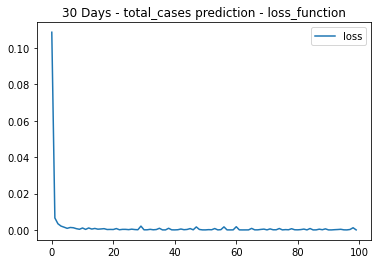

0.9999871683926105
0.9999907433306527


>>>>>>>> 45 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')


 Training and testing - 45 days ahead


target_n = total_cases_45
features = 10
X.shape = (24267, 9), y.shape = (24267, 1)
Model: "sequential_1"
____________________________________________________________

721/721 [==============================] - 2s 3ms/step - loss: 2.3369e-04 - mse: 2.3369e-04
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 3.1118e-05 - mse: 3.1118e-05
Epoch 64/100
721/721 [==============================] - 2s 3ms/step - loss: 2.9661e-04 - mse: 2.9661e-04
Epoch 65/100
721/721 [==============================] - 2s 3ms/step - loss: 9.9116e-05 - mse: 9.9116e-05
Epoch 66/100
721/721 [==============================] - 2s 3ms/step - loss: 9.1962e-05 - mse: 9.1962e-05
Epoch 67/100
721/721 [==============================] - 2s 3ms/step - loss: 6.5109e-06 - mse: 6.5109e-06
Epoch 68/100
721/721 [==============================] - 2s 3ms/step - loss: 1.8809e-04 - mse: 1.8809e-04
Epoch 69/100
721/721 [==============================] - 2s 3ms/step - loss: 5.4349e-04 - mse: 5.4349e-04
Epoch 70/100
721/721 [==============================] - 2s 3ms/step - loss: 7.3845e-06 - mse: 7.3845e-06
Epoch 71/100
721/721 [==============================] - 2s 3ms/step 

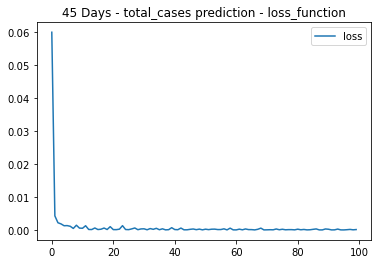

0.999765116877316
0.9998164691435286


>>>>>>>> 60 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')


 Training and testing - 60 days ahead


target_n = total_cases_60
features = 10
X.shape = (21822, 9), y.shape = (21822, 1)
Model: "sequential_2"
_____________________________________________________________

648/648 [==============================] - 2s 3ms/step - loss: 0.0011 - mse: 0.0011
Epoch 63/100
648/648 [==============================] - 2s 3ms/step - loss: 2.8749e-05 - mse: 2.8749e-05
Epoch 64/100
648/648 [==============================] - 2s 3ms/step - loss: 5.1538e-05 - mse: 5.1538e-05
Epoch 65/100
648/648 [==============================] - 2s 3ms/step - loss: 2.6085e-05 - mse: 2.6085e-05
Epoch 66/100
648/648 [==============================] - 2s 3ms/step - loss: 6.1879e-05 - mse: 6.1879e-05
Epoch 67/100
648/648 [==============================] - 2s 3ms/step - loss: 1.3468e-04 - mse: 1.3468e-04
Epoch 68/100
648/648 [==============================] - 2s 4ms/step - loss: 3.6824e-04 - mse: 3.6824e-04
Epoch 69/100
648/648 [==============================] - 2s 3ms/step - loss: 1.1635e-04 - mse: 1.1635e-04
Epoch 70/100
648/648 [==============================] - 2s 3ms/step - loss: 7.6540e-05 - mse: 7.6540e-05
Epoch 71/100
648/648 [==============================] - 2s 3ms/step - loss: 

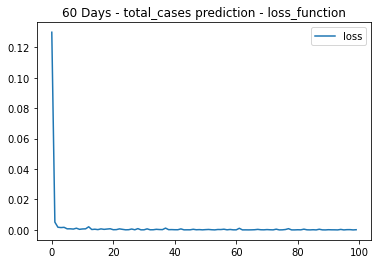

0.9999911777248892
0.999982345624943


>>>>>>>> 75 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')


 Training and testing - 75 days ahead


target_n = total_cases_75
features = 10
X.shape = (19577, 9), y.shape = (19577, 1)
Model: "sequential_3"
_____________________________________________________________

582/582 [==============================] - 2s 3ms/step - loss: 3.1668e-04 - mse: 3.1668e-04
Epoch 63/100
582/582 [==============================] - 2s 3ms/step - loss: 2.6101e-05 - mse: 2.6101e-05
Epoch 64/100
582/582 [==============================] - 2s 3ms/step - loss: 3.2719e-05 - mse: 3.2719e-05
Epoch 65/100
582/582 [==============================] - 2s 3ms/step - loss: 4.3733e-04 - mse: 4.3733e-04
Epoch 66/100
582/582 [==============================] - 2s 3ms/step - loss: 5.1548e-05 - mse: 5.1548e-05
Epoch 67/100
582/582 [==============================] - 2s 4ms/step - loss: 5.3664e-05 - mse: 5.3664e-05
Epoch 68/100
582/582 [==============================] - 2s 3ms/step - loss: 5.3859e-04 - mse: 5.3859e-04
Epoch 69/100
582/582 [==============================] - 2s 3ms/step - loss: 4.5842e-04 - mse: 4.5842e-04
Epoch 70/100
582/582 [==============================] - 2s 3ms/step - loss: 2.0431e-05 - mse: 2.0431e-05
Epoch 71/100
582/582 [==============================] - 2s 3ms/step 

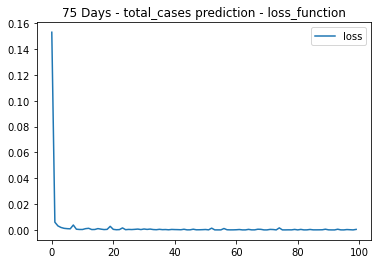

0.9986035565783443
0.9991061774332719
total_deaths %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>




>>>>>>>> 30 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')


 Training and testing - 30 days ahead


target_n = total_deaths_30
features = 10
X.shape = (26711, 9), y.shape = (26711, 

793/793 [==============================] - 3s 4ms/step - loss: 5.2065e-05 - mse: 5.2065e-05
Epoch 62/100
793/793 [==============================] - 2s 3ms/step - loss: 4.1653e-05 - mse: 4.1653e-05
Epoch 63/100
793/793 [==============================] - 2s 3ms/step - loss: 3.6071e-04 - mse: 3.6071e-04
Epoch 64/100
793/793 [==============================] - 3s 4ms/step - loss: 2.3556e-05 - mse: 2.3556e-05
Epoch 65/100
793/793 [==============================] - 3s 4ms/step - loss: 2.6323e-05 - mse: 2.6323e-05
Epoch 66/100
793/793 [==============================] - 2s 3ms/step - loss: 1.3936e-04 - mse: 1.3936e-04
Epoch 67/100
793/793 [==============================] - 3s 4ms/step - loss: 3.0261e-05 - mse: 3.0261e-05
Epoch 68/100
793/793 [==============================] - 3s 3ms/step - loss: 6.2485e-05 - mse: 6.2485e-05
Epoch 69/100
793/793 [==============================] - 3s 3ms/step - loss: 1.0382e-04 - mse: 1.0382e-04
Epoch 70/100
793/793 [==============================] - 2s 3ms/step 

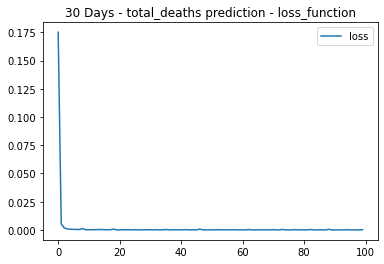

0.9999944483532032
0.9999931834292357


>>>>>>>> 45 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')


 Training and testing - 45 days ahead


target_n = total_deaths_45
features = 10
X.shape = (24267, 9), y.shape = (24267, 1)
Model: "sequential_5"
___________________________________________________________

721/721 [==============================] - 2s 3ms/step - loss: 2.4383e-04 - mse: 2.4383e-04
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 8.5308e-05 - mse: 8.5308e-05
Epoch 64/100
721/721 [==============================] - 2s 3ms/step - loss: 3.2111e-04 - mse: 3.2111e-04
Epoch 65/100
721/721 [==============================] - 2s 3ms/step - loss: 2.4888e-04 - mse: 2.4888e-04
Epoch 66/100
721/721 [==============================] - 2s 3ms/step - loss: 1.3830e-05 - mse: 1.3830e-05
Epoch 67/100
721/721 [==============================] - 2s 3ms/step - loss: 3.5732e-04 - mse: 3.5732e-04
Epoch 68/100
721/721 [==============================] - 2s 3ms/step - loss: 1.3129e-05 - mse: 1.3129e-05
Epoch 69/100
721/721 [==============================] - 2s 3ms/step - loss: 1.3529e-04 - mse: 1.3529e-04
Epoch 70/100
721/721 [==============================] - 2s 3ms/step - loss: 7.9386e-05 - mse: 7.9386e-05
Epoch 71/100
721/721 [==============================] - 2s 3ms/step 

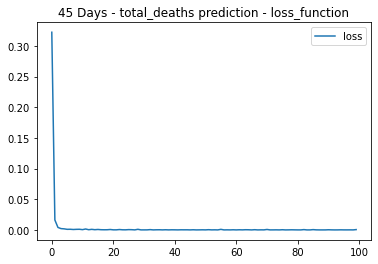

0.9999900286001772
0.9999888211811195


>>>>>>>> 60 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')


 Training and testing - 60 days ahead


target_n = total_deaths_60
features = 10
X.shape = (21822, 9), y.shape = (21822, 1)
Model: "sequential_6"
___________________________________________________________

648/648 [==============================] - 2s 3ms/step - loss: 0.0027 - mse: 0.0027
Epoch 67/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0020 - mse: 0.0020
Epoch 68/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 69/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0024 - mse: 0.0024
Epoch 70/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0016 - mse: 0.0016
Epoch 71/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 72/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0018 - mse: 0.0018
Epoch 73/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0029 - mse: 0.0029
Epoch 74/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0012 - mse: 0.0012
Epoch 75/100
648/648 [==============================] - 2s 3ms/step - loss: 9.7365e-04 - mse: 9.7365e-04
Epoch 76/100
648/648 [=============

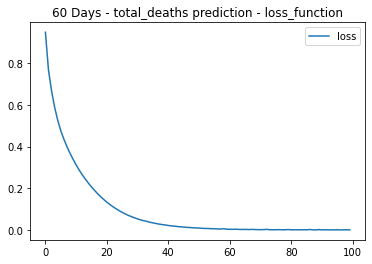

0.9993072226353678
0.9993955669651313


>>>>>>>> 75 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')


 Training and testing - 75 days ahead


target_n = total_deaths_75
features = 10
X.shape = (19577, 9), y.shape = (19577, 1)
Model: "sequential_7"
___________________________________________________________

582/582 [==============================] - 2s 4ms/step - loss: 2.7952e-05 - mse: 2.7952e-05
Epoch 63/100
582/582 [==============================] - 2s 4ms/step - loss: 7.0747e-05 - mse: 7.0747e-05
Epoch 64/100
582/582 [==============================] - 3s 5ms/step - loss: 6.4007e-05 - mse: 6.4007e-05
Epoch 65/100
582/582 [==============================] - 2s 4ms/step - loss: 4.0346e-04 - mse: 4.0346e-04
Epoch 66/100
582/582 [==============================] - 3s 4ms/step - loss: 1.3409e-05 - mse: 1.3409e-05
Epoch 67/100
582/582 [==============================] - 2s 3ms/step - loss: 3.5099e-05 - mse: 3.5099e-05
Epoch 68/100
582/582 [==============================] - 3s 4ms/step - loss: 3.9763e-04 - mse: 3.9763e-04
Epoch 69/100
582/582 [==============================] - 2s 4ms/step - loss: 2.1152e-05 - mse: 2.1152e-05
Epoch 70/100
582/582 [==============================] - 2s 4ms/step - loss: 1.8260e-05 - mse: 1.8260e-05
Epoch 71/100
582/582 [==============================] - 3s 5ms/step 

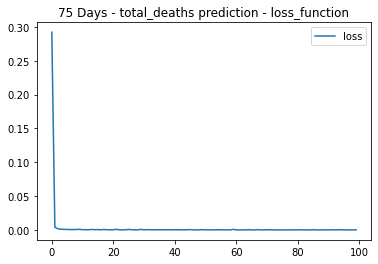

0.9999966409560649
0.9999968176149423
total_cases %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>




>>>>>>>> 30 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_d

793/793 [==============================] - 2s 3ms/step - loss: 0.0210 - mse: 0.0210
Epoch 65/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0196 - mse: 0.0196
Epoch 66/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0184 - mse: 0.0184
Epoch 67/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0178 - mse: 0.0178
Epoch 68/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0169 - mse: 0.0169
Epoch 69/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0154 - mse: 0.0154
Epoch 70/100
793/793 [==============================] - 3s 3ms/step - loss: 0.0145 - mse: 0.0145
Epoch 71/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0144 - mse: 0.0144
Epoch 72/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 73/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0120 - mse: 0.0120
Epoch 74/100
793/793 [=====================

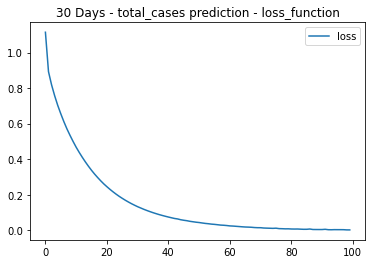

0.9978929931010978
0.9978317544197414


>>>>>>>> 45 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')


 Training and testing - 45 days ahead


target_

721/721 [==============================] - 2s 3ms/step - loss: 2.1726e-04 - mse: 2.1726e-04
Epoch 62/100
721/721 [==============================] - 2s 3ms/step - loss: 5.0627e-04 - mse: 5.0627e-04
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 1.7138e-04 - mse: 1.7138e-04
Epoch 64/100
721/721 [==============================] - 2s 3ms/step - loss: 2.7677e-04 - mse: 2.7677e-04
Epoch 65/100
721/721 [==============================] - 3s 4ms/step - loss: 2.4610e-04 - mse: 2.4610e-04
Epoch 66/100
721/721 [==============================] - 2s 3ms/step - loss: 2.0257e-04 - mse: 2.0257e-04
Epoch 67/100
721/721 [==============================] - 2s 3ms/step - loss: 2.4752e-04 - mse: 2.4752e-04
Epoch 68/100
721/721 [==============================] - 2s 3ms/step - loss: 3.4305e-05 - mse: 3.4305e-05
Epoch 69/100
721/721 [==============================] - 2s 3ms/step - loss: 2.2674e-04 - mse: 2.2674e-04
Epoch 70/100
721/721 [==============================] - 2s 3ms/step 

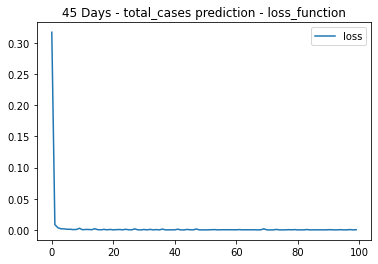

0.9999283337712221
0.999904454860398


>>>>>>>> 60 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')


 Training and testing - 60 days ahead


target_n

648/648 [==============================] - 2s 3ms/step - loss: 1.9844e-04 - mse: 1.9844e-04
Epoch 61/100
648/648 [==============================] - 2s 3ms/step - loss: 3.6367e-04 - mse: 3.6367e-04
Epoch 62/100
648/648 [==============================] - 2s 3ms/step - loss: 3.5379e-05 - mse: 3.5379e-05
Epoch 63/100
648/648 [==============================] - 2s 3ms/step - loss: 4.8581e-05 - mse: 4.8581e-05
Epoch 64/100
648/648 [==============================] - 2s 3ms/step - loss: 3.9651e-04 - mse: 3.9651e-04
Epoch 65/100
648/648 [==============================] - 2s 3ms/step - loss: 1.7018e-04 - mse: 1.7018e-04
Epoch 66/100
648/648 [==============================] - 2s 3ms/step - loss: 3.5772e-05 - mse: 3.5772e-05
Epoch 67/100
648/648 [==============================] - 2s 3ms/step - loss: 8.8637e-04 - mse: 8.8637e-04
Epoch 68/100
648/648 [==============================] - 2s 3ms/step - loss: 1.1282e-04 - mse: 1.1282e-04
Epoch 69/100
648/648 [==============================] - 2s 3ms/step 

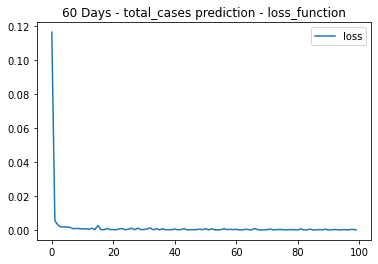

0.9999905964531902
0.9999908599010604


>>>>>>>> 75 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')


 Training and testing - 75 days ahead


target_

582/582 [==============================] - 2s 3ms/step - loss: 1.3732e-04 - mse: 1.3732e-04
Epoch 62/100
582/582 [==============================] - 1s 2ms/step - loss: 2.2671e-04 - mse: 2.2671e-04
Epoch 63/100
582/582 [==============================] - 2s 3ms/step - loss: 4.2933e-04 - mse: 4.2933e-04
Epoch 64/100
582/582 [==============================] - 2s 3ms/step - loss: 1.9073e-04 - mse: 1.9073e-04
Epoch 65/100
582/582 [==============================] - 2s 3ms/step - loss: 8.5549e-05 - mse: 8.5549e-05
Epoch 66/100
582/582 [==============================] - 2s 3ms/step - loss: 3.3012e-04 - mse: 3.3012e-04
Epoch 67/100
582/582 [==============================] - 2s 3ms/step - loss: 2.8122e-04 - mse: 2.8122e-04
Epoch 68/100
582/582 [==============================] - 1s 2ms/step - loss: 9.6837e-05 - mse: 9.6837e-05
Epoch 69/100
582/582 [==============================] - 2s 3ms/step - loss: 6.6778e-04 - mse: 6.6778e-04
Epoch 70/100
582/582 [==============================] - 2s 3ms/step 

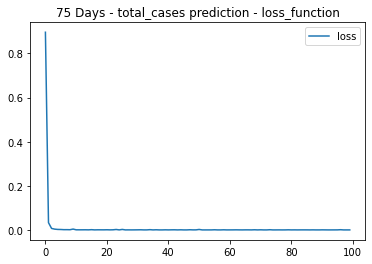

0.999829881150369
0.9998078719655835
total_deaths %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>




>>>>>>>> 30 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_d

793/793 [==============================] - 2s 3ms/step - loss: 1.2033e-05 - mse: 1.2033e-05
Epoch 60/100
793/793 [==============================] - 2s 3ms/step - loss: 6.6543e-06 - mse: 6.6543e-06
Epoch 61/100
793/793 [==============================] - 2s 3ms/step - loss: 6.4775e-04 - mse: 6.4775e-04
Epoch 62/100
793/793 [==============================] - 2s 3ms/step - loss: 1.1026e-05 - mse: 1.1026e-05
Epoch 63/100
793/793 [==============================] - 2s 3ms/step - loss: 7.6490e-06 - mse: 7.6490e-06
Epoch 64/100
793/793 [==============================] - 2s 3ms/step - loss: 3.9072e-05 - mse: 3.9072e-05
Epoch 65/100
793/793 [==============================] - 2s 3ms/step - loss: 2.9186e-05 - mse: 2.9186e-05
Epoch 66/100
793/793 [==============================] - 2s 3ms/step - loss: 1.2471e-04 - mse: 1.2471e-04
Epoch 67/100
793/793 [==============================] - 2s 2ms/step - loss: 4.9267e-05 - mse: 4.9267e-05
Epoch 68/100
793/793 [==============================] - 2s 3ms/step 

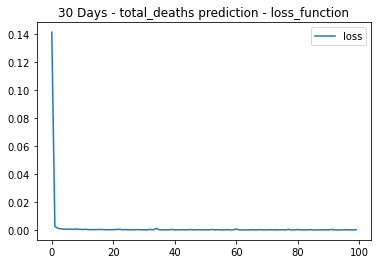

0.9999921381846378
0.9999924151063039


>>>>>>>> 45 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')


 Training and testing - 45 days ahead


target_

721/721 [==============================] - 3s 4ms/step - loss: 2.0542e-04 - mse: 2.0542e-04
Epoch 61/100
721/721 [==============================] - 2s 3ms/step - loss: 4.9246e-05 - mse: 4.9246e-05
Epoch 62/100
721/721 [==============================] - 2s 3ms/step - loss: 2.9074e-04 - mse: 2.9074e-04
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 2.2763e-05 - mse: 2.2763e-05
Epoch 64/100
721/721 [==============================] - 2s 3ms/step - loss: 1.0522e-04 - mse: 1.0522e-04
Epoch 65/100
721/721 [==============================] - 2s 3ms/step - loss: 4.2440e-04 - mse: 4.2440e-04
Epoch 66/100
721/721 [==============================] - 2s 3ms/step - loss: 7.4361e-05 - mse: 7.4361e-05
Epoch 67/100
721/721 [==============================] - 2s 3ms/step - loss: 6.0634e-05 - mse: 6.0634e-05
Epoch 68/100
721/721 [==============================] - 2s 3ms/step - loss: 1.6071e-04 - mse: 1.6071e-04
Epoch 69/100
721/721 [==============================] - 2s 3ms/step 

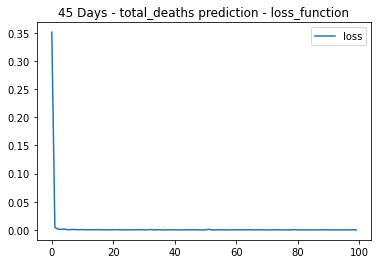

0.9999707530851916
0.9999689102815573


>>>>>>>> 60 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')


 Training and testing - 60 days ahead


target_

648/648 [==============================] - 2s 3ms/step - loss: 5.8922e-05 - mse: 5.8922e-05
Epoch 62/100
648/648 [==============================] - 2s 3ms/step - loss: 5.3689e-05 - mse: 5.3689e-05
Epoch 63/100
648/648 [==============================] - 2s 3ms/step - loss: 3.1290e-04 - mse: 3.1290e-04
Epoch 64/100
648/648 [==============================] - 2s 3ms/step - loss: 4.8274e-04 - mse: 4.8274e-04
Epoch 65/100
648/648 [==============================] - 2s 3ms/step - loss: 3.4509e-05 - mse: 3.4509e-05
Epoch 66/100
648/648 [==============================] - 2s 3ms/step - loss: 5.7873e-05 - mse: 5.7873e-05
Epoch 67/100
648/648 [==============================] - 2s 3ms/step - loss: 1.5393e-04 - mse: 1.5393e-04
Epoch 68/100
648/648 [==============================] - 3s 4ms/step - loss: 8.3775e-05 - mse: 8.3775e-05
Epoch 69/100
648/648 [==============================] - 2s 3ms/step - loss: 4.4564e-05 - mse: 4.4564e-05
Epoch 70/100
648/648 [==============================] - 2s 3ms/step 

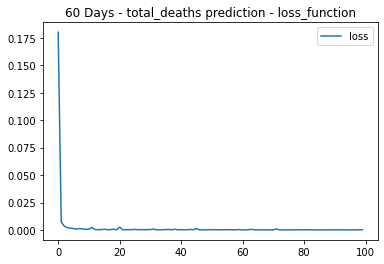

0.9999801966436286
0.9999818024865144


>>>>>>>> 75 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')


 Training and testing - 75 days ahead


target_

582/582 [==============================] - 2s 3ms/step - loss: 2.7088e-04 - mse: 2.7088e-04
Epoch 62/100
582/582 [==============================] - 2s 3ms/step - loss: 8.3531e-05 - mse: 8.3531e-05
Epoch 63/100
582/582 [==============================] - 2s 3ms/step - loss: 5.0290e-05 - mse: 5.0290e-05
Epoch 64/100
582/582 [==============================] - 2s 3ms/step - loss: 3.3326e-04 - mse: 3.3326e-04
Epoch 65/100
582/582 [==============================] - 1s 3ms/step - loss: 6.3312e-05 - mse: 6.3312e-05
Epoch 66/100
582/582 [==============================] - 2s 3ms/step - loss: 3.2102e-05 - mse: 3.2102e-05
Epoch 67/100
582/582 [==============================] - 2s 3ms/step - loss: 3.0804e-04 - mse: 3.0804e-04
Epoch 68/100
582/582 [==============================] - 2s 3ms/step - loss: 7.8275e-06 - mse: 7.8275e-06
Epoch 69/100
582/582 [==============================] - 2s 3ms/step - loss: 1.1117e-04 - mse: 1.1117e-04
Epoch 70/100
582/582 [==============================] - 2s 3ms/step 

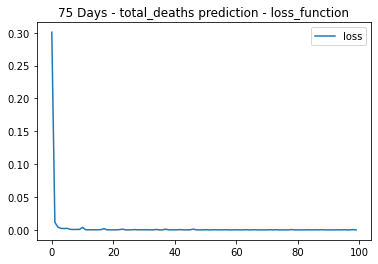

0.9999945547043586
0.9999947272577583
total_cases %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>




>>>>>>>> 30 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal mo

793/793 [==============================] - 2s 3ms/step - loss: 6.3472e-05 - mse: 6.3472e-05
Epoch 59/100
793/793 [==============================] - 2s 3ms/step - loss: 8.6245e-04 - mse: 8.6245e-04
Epoch 60/100
793/793 [==============================] - 2s 3ms/step - loss: 3.6357e-05 - mse: 3.6357e-05
Epoch 61/100
793/793 [==============================] - 2s 3ms/step - loss: 2.1041e-04 - mse: 2.1041e-04
Epoch 62/100
793/793 [==============================] - 2s 3ms/step - loss: 3.3127e-04 - mse: 3.3127e-04
Epoch 63/100
793/793 [==============================] - 2s 3ms/step - loss: 3.2252e-04 - mse: 3.2252e-04
Epoch 64/100
793/793 [==============================] - 2s 3ms/step - loss: 2.3493e-05 - mse: 2.3493e-05
Epoch 65/100
793/793 [==============================] - 2s 3ms/step - loss: 5.6194e-04 - mse: 5.6194e-04
Epoch 66/100
793/793 [==============================] - 2s 3ms/step - loss: 8.3493e-05 - mse: 8.3493e-05
Epoch 67/100
793/793 [==============================] - 2s 3ms/step 

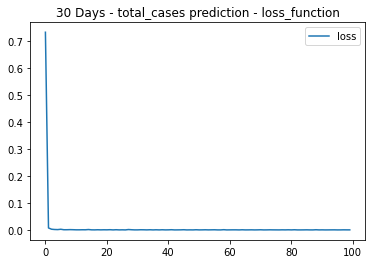

0.9999857258598629
0.9999834879901441


>>>>>>>> 45 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',


721/721 [==============================] - 2s 2ms/step - loss: 1.0457e-04 - mse: 1.0457e-04
Epoch 60/100
721/721 [==============================] - 2s 3ms/step - loss: 1.4556e-04 - mse: 1.4556e-04
Epoch 61/100
721/721 [==============================] - 2s 3ms/step - loss: 7.8984e-04 - mse: 7.8984e-04
Epoch 62/100
721/721 [==============================] - 2s 3ms/step - loss: 9.2341e-05 - mse: 9.2341e-05
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 3.7842e-04 - mse: 3.7842e-04
Epoch 64/100
721/721 [==============================] - 2s 3ms/step - loss: 5.8991e-05 - mse: 5.8991e-05
Epoch 65/100
721/721 [==============================] - 2s 3ms/step - loss: 5.2546e-04 - mse: 5.2546e-04
Epoch 66/100
721/721 [==============================] - 2s 3ms/step - loss: 2.2922e-04 - mse: 2.2922e-04
Epoch 67/100
721/721 [==============================] - 2s 3ms/step - loss: 3.7435e-05 - mse: 3.7435e-05
Epoch 68/100
721/721 [==============================] - 2s 3ms/step 

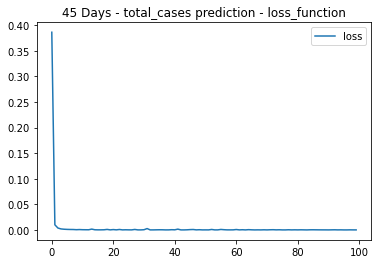

0.9996646764448497
0.9995448211892911


>>>>>>>> 60 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',


648/648 [==============================] - 2s 3ms/step - loss: 3.6287e-05 - mse: 3.6287e-05
Epoch 61/100
648/648 [==============================] - 2s 3ms/step - loss: 4.6458e-04 - mse: 4.6458e-04
Epoch 62/100
648/648 [==============================] - 2s 3ms/step - loss: 2.6164e-05 - mse: 2.6164e-05
Epoch 63/100
648/648 [==============================] - 2s 3ms/step - loss: 4.7205e-04 - mse: 4.7205e-04
Epoch 64/100
648/648 [==============================] - 2s 3ms/step - loss: 2.7932e-05 - mse: 2.7932e-05
Epoch 65/100
648/648 [==============================] - 2s 3ms/step - loss: 2.3779e-05 - mse: 2.3779e-05
Epoch 66/100
648/648 [==============================] - 2s 3ms/step - loss: 5.8915e-05 - mse: 5.8915e-05
Epoch 67/100
648/648 [==============================] - 2s 3ms/step - loss: 1.8717e-04 - mse: 1.8717e-04
Epoch 68/100
648/648 [==============================] - 2s 3ms/step - loss: 1.3161e-04 - mse: 1.3161e-04
Epoch 69/100
648/648 [==============================] - 2s 3ms/step 

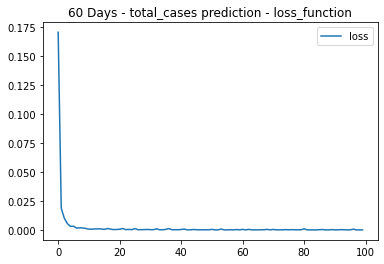

0.9998556486399846
0.9998470385208168


>>>>>>>> 75 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',


582/582 [==============================] - 2s 3ms/step - loss: 2.4328e-04 - mse: 2.4328e-04
Epoch 61/100
582/582 [==============================] - 2s 3ms/step - loss: 5.2694e-04 - mse: 5.2694e-04
Epoch 62/100
582/582 [==============================] - 2s 4ms/step - loss: 1.0692e-04 - mse: 1.0692e-04
Epoch 63/100
582/582 [==============================] - 2s 4ms/step - loss: 3.9677e-05 - mse: 3.9677e-05
Epoch 64/100
582/582 [==============================] - 2s 3ms/step - loss: 7.2670e-05 - mse: 7.2670e-05
Epoch 65/100
582/582 [==============================] - 2s 3ms/step - loss: 0.0013 - mse: 0.0013
Epoch 66/100
582/582 [==============================] - 2s 3ms/step - loss: 3.2601e-05 - mse: 3.2601e-05
Epoch 67/100
582/582 [==============================] - 2s 3ms/step - loss: 2.9153e-05 - mse: 2.9153e-05
Epoch 68/100
582/582 [==============================] - 2s 3ms/step - loss: 7.1357e-05 - mse: 7.1357e-05
Epoch 69/100
582/582 [==============================] - 2s 3ms/step - loss: 

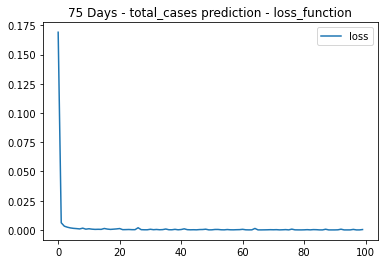

0.9987615495876535
0.9987875907823557
total_deaths %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>




>>>>>>>> 30 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_30', 'date_30', 'total_cases_30', 'total_deaths_30'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal m

793/793 [==============================] - 2s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 63/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0028 - mse: 0.0028
Epoch 64/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0025 - mse: 0.0025
Epoch 65/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0021 - mse: 0.0021
Epoch 66/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0022 - mse: 0.0022
Epoch 67/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0019 - mse: 0.0019
Epoch 68/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0019 - mse: 0.0019
Epoch 69/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0022 - mse: 0.0022
Epoch 70/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0014 - mse: 0.0014
Epoch 71/100
793/793 [==============================] - 2s 3ms/step - loss: 0.0015 - mse: 0.0015
Epoch 72/100
793/793 [=====================

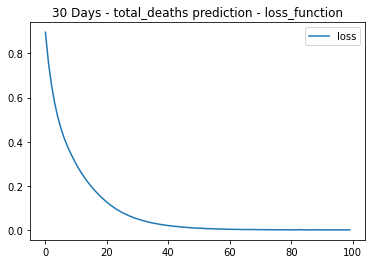

0.9993020858135094
0.9995394387520921


>>>>>>>> 45 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_45', 'date_45', 'total_cases_45', 'total_deaths_45'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',


721/721 [==============================] - 2s 3ms/step - loss: 2.4286e-04 - mse: 2.4286e-04
Epoch 60/100
721/721 [==============================] - 2s 3ms/step - loss: 1.1004e-04 - mse: 1.1004e-04
Epoch 61/100
721/721 [==============================] - 2s 2ms/step - loss: 1.4373e-04 - mse: 1.4373e-04
Epoch 62/100
721/721 [==============================] - 2s 3ms/step - loss: 1.2123e-04 - mse: 1.2123e-04
Epoch 63/100
721/721 [==============================] - 2s 3ms/step - loss: 6.0405e-05 - mse: 6.0405e-05
Epoch 64/100
721/721 [==============================] - 2s 3ms/step - loss: 1.8383e-04 - mse: 1.8383e-04
Epoch 65/100
721/721 [==============================] - 2s 3ms/step - loss: 8.0880e-05 - mse: 8.0880e-05
Epoch 66/100
721/721 [==============================] - 2s 3ms/step - loss: 1.2133e-04 - mse: 1.2133e-04
Epoch 67/100
721/721 [==============================] - 2s 3ms/step - loss: 2.3541e-05 - mse: 2.3541e-05
Epoch 68/100
721/721 [==============================] - 2s 2ms/step 

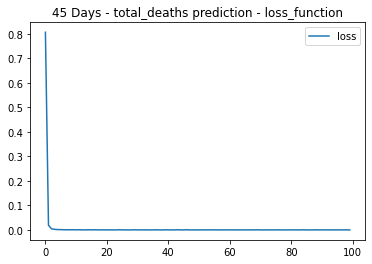

0.9999926399213009
0.9999928453399134


>>>>>>>> 60 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_60', 'date_60', 'total_cases_60', 'total_deaths_60'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',


648/648 [==============================] - 2s 3ms/step - loss: 3.1827e-05 - mse: 3.1827e-05
Epoch 60/100
648/648 [==============================] - 2s 3ms/step - loss: 2.6731e-04 - mse: 2.6731e-04
Epoch 61/100
648/648 [==============================] - 3s 5ms/step - loss: 4.6217e-05 - mse: 4.6217e-05
Epoch 62/100
648/648 [==============================] - 2s 4ms/step - loss: 1.6835e-05 - mse: 1.6835e-05
Epoch 63/100
648/648 [==============================] - 2s 4ms/step - loss: 1.1095e-04 - mse: 1.1095e-04
Epoch 64/100
648/648 [==============================] - 2s 3ms/step - loss: 3.6401e-05 - mse: 3.6401e-05
Epoch 65/100
648/648 [==============================] - 2s 3ms/step - loss: 9.3953e-05 - mse: 9.3953e-05
Epoch 66/100
648/648 [==============================] - 2s 3ms/step - loss: 8.2331e-05 - mse: 8.2331e-05
Epoch 67/100
648/648 [==============================] - 2s 3ms/step - loss: 3.4348e-04 - mse: 3.4348e-04
Epoch 68/100
648/648 [==============================] - 2s 3ms/step 

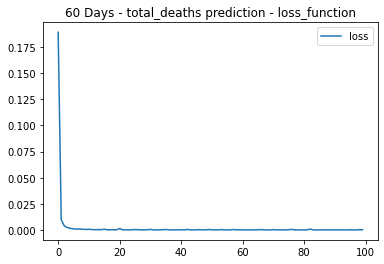

0.9999976417185217
0.9999964927504899


>>>>>>>> 75 >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 
Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',
       'date_75', 'date_75', 'total_cases_75', 'total_deaths_75'],
      dtype='object')
df_n.columns: ====================================>
]n Index(['date', 'iso_code', 'population', 'population_density', 'median_age',
       'C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'total_cases', 'total_deaths',


582/582 [==============================] - 2s 3ms/step - loss: 4.6486e-05 - mse: 4.6486e-05
Epoch 60/100
582/582 [==============================] - 2s 3ms/step - loss: 3.1868e-04 - mse: 3.1868e-04
Epoch 61/100
582/582 [==============================] - 2s 3ms/step - loss: 4.6010e-05 - mse: 4.6010e-05
Epoch 62/100
582/582 [==============================] - 2s 3ms/step - loss: 3.0843e-04 - mse: 3.0843e-04
Epoch 63/100
582/582 [==============================] - 2s 3ms/step - loss: 1.6413e-05 - mse: 1.6413e-05
Epoch 64/100
582/582 [==============================] - 2s 3ms/step - loss: 1.7024e-05 - mse: 1.7024e-05
Epoch 65/100
582/582 [==============================] - 2s 3ms/step - loss: 3.5110e-05 - mse: 3.5110e-05
Epoch 66/100
582/582 [==============================] - 2s 3ms/step - loss: 3.4281e-04 - mse: 3.4281e-04
Epoch 67/100
582/582 [==============================] - 2s 3ms/step - loss: 2.2900e-05 - mse: 2.2900e-05
Epoch 68/100
582/582 [==============================] - 2s 3ms/step 

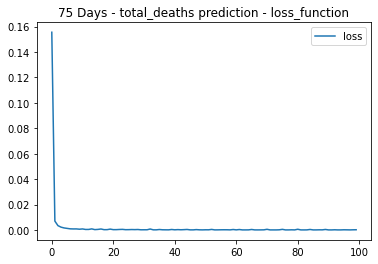

0.999994295275464
0.999994172806357


In [38]:
# Regression Analysis
#features = ['population','population_density','median_age','total_cases','total_deaths','C1_School closing',
#       'C2_Workplace closing', 'C6_Stay at home requirements', 'C7_Flag','C8_International travel controls']

layers = { 
            "number_input_features": 10,
            "n_layers": 4, 
            "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
            "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
            "l2":{"number_hidden_nodes":4,"activation_function":"relu"},
            "l3":{"number_hidden_nodes":1,"activation_function":"linear"}
        }

models = {}

for i,df in enumerate(dfs):

    features = df.columns
    
    days = get_days(df)
    
#     for n in range(len(days)):
        
#         df_n = df.merge(days[n],on=["date","iso_code"],how="left")
        
#         print(df_n.columns)
        
        #features = df_n.columns.values
#         features = [f for f in features if re.search("_\d{2}$",f) == None]
#         features = features[2:]  # Remove date and iso_code
        
#         layers["number_input_features"] = len(features)
        
    for target in ["total_cases","total_deaths"]:
        models[target] = []
        print(f"{target} %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%>\n\n")
        for i,day in enumerate(future):
            print(f"\n\n>>>>>>>> {day} >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ")

            df_n = df.merge(days[i],on=["date","iso_code"],how="left")
            print(df_n.columns)

            features = [f for f in features if re.search("_\d{2}$",f) == None]
            features = features[2:]  # Remove date and iso_code

            layers["number_input_features"] = len(features)

            print(f"df_n.columns: ====================================>\n]n {df_n.columns}")

            md = ml(df=df_n,
                    test_size=0.05,
                    target=target,
                    period=day,
                    **layers
                   )

            md.train_test()

            models[target].append(md.get_model())
                # print(models[target])
                # x = input("Continue?")


In [ ]:
models

features = ['population','population_density','median_age','total_cases','total_deaths','C1_School closing',
       'C2_Workplace closing', 'C6_Stay at home requirements', 'C7_Flag','C8_International travel controls']

layers = { "number_input_features": 10,
      "n_layers": 4, 
      "l0":{"number_hidden_nodes":18,"activation_function":"relu"},
      "l1":{"number_hidden_nodes":9,"activation_function":"relu"},
      "l2":{"number_hidden_nodes":4,"activation_function":"relu"},
      "l3":{"number_hidden_nodes":1,"activation_function":"linear"}
          
     }

mc = ml()
mc.train_test(df=final_df,test_size=0.05,features=features,target="total_cases",**layers)
# model_c = mc.getModel()

In [ ]:
final_df.to_csv("final.csv")